# Challenge Frequência e Medidas - Squad Mae C Jemison

Autoras:
- Ana Carolina Szczepanski Oliveira
- Camila Alves Reimberg
- Claisa  Lubke
- Elis Regina Weiss
- Hanna Câmara da Justa
- Iris Brandao Pires Linhares
- Isabella Stersa de Oliveira
- Larissa das Chagas Brum
- Lidiane Vicente



# Instrução do Desafio

Desafio 1: Entendendo os estudantes.

- Esse desafio tem como objetivo responder algumas perguntas através da
análise de dados, aprofundando o conhecimento em frequência e medidas.

- Conjunto de dados: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
    - Os dados são arquivos em .csv

- Este conjunto de dados consiste nas notas obtidas pelos alunos em várias
disciplinas e suas informações pessoais.
Variáveis:
    - gender - gênero do aluno
    - race/ethnicity - raça/etnia dos alunos
    - parental level of education - grau de escolaridade dos pais
    - lunch - tipo de almoço
    - test preparation course - indica se fez curso preparatório
    - math score - nota na prova de matematica
    - reading score - nota na prova de leitura
    - writing score - nota na prova de escrita

# Resolução do Desafio

## Importação de biblioteca

In [ ]:
### Importação dataset
from google.colab import files

### Bibliotecas base
import pandas as pd
import numpy as np
### Bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
### Bibliotecas para estatística

from tabulate import tabulate

import warnings

## Configuração

In [ ]:
warnings.filterwarnings('ignore')

## Importação do dataset

In [ ]:
upload = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance (1).csv


## Leitura do arquivo e Criação de Dataframe

In [ ]:
df_estudantes = pd.read_csv('StudentsPerformance.csv')

## Criação de cópia do dataframe

In [ ]:
df_estudantes_copia = df_estudantes.copy()

## Leitura do dataframe

In [ ]:
df_estudantes_copia.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Análise inicial


#### 1. Tamanho da base de dados (quantidade de linhas, colunas e tipo das variáveis)

In [ ]:
df_estudantes_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 2. Resumo estatístico das variáveis numéricas

In [ ]:
df_estudantes_copia.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Manipulação de dados

#### 1. Alterar ou criar variáveis, renomear nome de coluna, alterar tipo de dados

In [ ]:
## Converter colunas categóricas para o tipo 'category'
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

df_estudantes_copia[categorical_cols] = df_estudantes_copia[categorical_cols].astype('category')

In [ ]:
## Verificação da alteração e tipos de dados
df_estudantes_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race/ethnicity               1000 non-null   category
 2   parental level of education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test preparation course      1000 non-null   category
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 29.2 KB


In [ ]:
## Criar uma nova coluna para a média das pontuações. axis = 1 para calcular por linhas.
df_estudantes_copia['average_score'] = df_estudantes_copia[['math score', 'reading score', 'writing score']].mean(axis=1).round(2)
df_estudantes_copia.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [ ]:
## Renomear nome das colunas
df_estudantes_copia.rename(columns={'parental level of education':'parental_level_of_education', 'test preparation course':'test_preparation_course','math score': 'math_score', 'reading score': 'reading_score', 'writing score': 'writing_score'}, inplace=True)
df_estudantes_copia.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


### Consultas

#### Questão 1

In [ ]:
# Verifique a quantidade de alunos em cada grupo racial/étnico.
df_estudantes_copia['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


#### Questão 2

In [ ]:
# Qual a quantidade de alunos de cada gênero?
qtde_genero = df_estudantes_copia['gender'].value_counts()
qtde_genero

,count
gender,
female,518
male,482


#### Questão 3

In [ ]:
# Existem mais alunos do gênero masculino ou feminino?
if qtde_genero['female'] > qtde_genero['male']:
    print("Existem mais alunas do gênero feminino.")
elif qtde_genero['male'] > qtde_genero['female']:
    print("Existem mais alunos do gênero masculino.")
else:
    print("O número de alunos do gênero masculino e feminino é igual.")

Existem mais alunas do gênero feminino.


#### Questão 4

##### Matemática

In [ ]:
# Analise as notas de matemática dos alunos de forma mais completa possível

## Medidas de Tendência Central
media_mat = df_estudantes_copia['math_score'].mean()
mediana_mat = df_estudantes_copia['math_score'].median()
moda_mat = df_estudantes_copia['math_score'].mode()

print(f'Média de Matemática: {media_mat:.2f}')
print(f'Mediana de Matemática: {mediana_mat:.2f}')
print(f'Moda de Matemática: {moda_mat[0]:.2f}')

Média de Matemática: 66.09
Mediana de Matemática: 66.00
Moda de Matemática: 65.00


In [ ]:
## Medidas de Dispersão
variancia_mat = df_estudantes_copia['math_score'].var()
desviopadrao_mat = df_estudantes_copia['math_score'].std()
max_mat = df_estudantes_copia['math_score'].max()
min_mat = df_estudantes_copia['math_score'].min()
amplitude_mat = max_mat - min_mat

print(f'Variância de Matemática: {variancia_mat:.2f}')
print(f'Desvio Padrão de Matemática: {desviopadrao_mat:.2f}')
print(f'Valor Máximo de Matemática: {max_mat:.2f}')
print(f'Valor Mínimo de Matemática: {min_mat:.2f}')
print(f'Amplitude de Matemática: {amplitude_mat:.2f}')

Variância de Matemática: 229.92
Desvio Padrão de Matemática: 15.16
Valor Máximo de Matemática: 100.00
Valor Mínimo de Matemática: 0.00
Amplitude de Matemática: 100.00


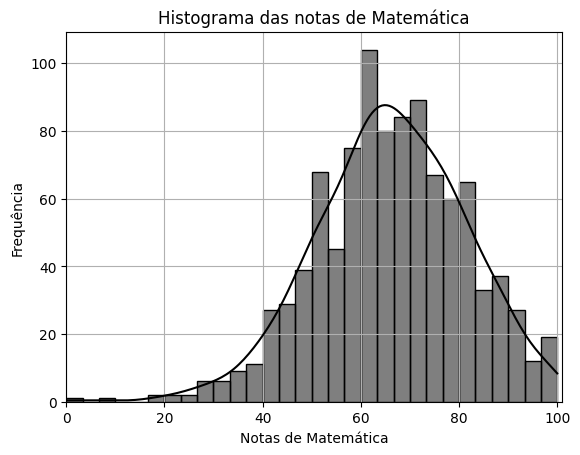

In [ ]:
## Histograma
sns.histplot(df_estudantes_copia['math_score'], bins=30, kde=True, color='black')

plt.xlim(0, 101)

plt.title('Histograma das notas de Matemática')
plt.xlabel('Notas de Matemática')
plt.ylabel('Frequência')
plt.grid(True)

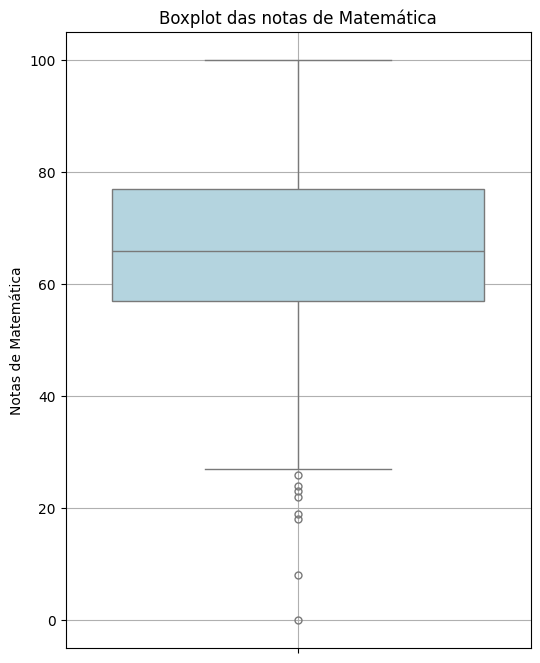

In [ ]:
## Boxplot
plt.figure(figsize=(6, 8))
sns.boxplot(y=df_estudantes_copia['math_score'], color='lightblue', fliersize=5)
plt.title('Boxplot das notas de Matemática')
plt.ylabel('Notas de Matemática')
plt.grid(True)

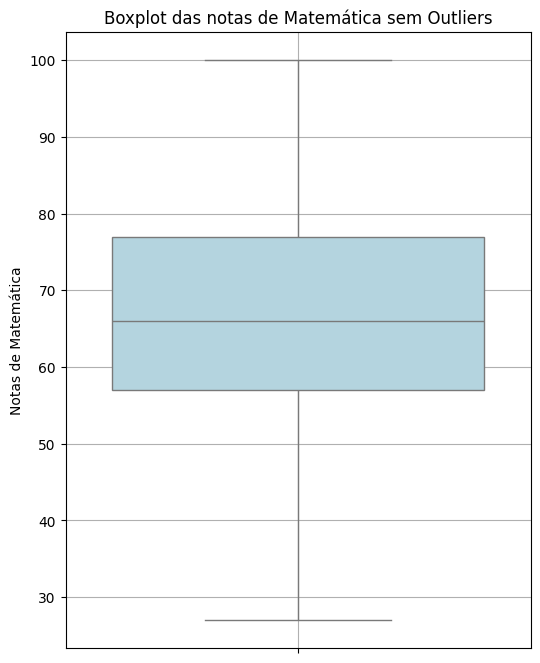

In [ ]:
## Boxplot sem outliers
plt.figure(figsize=(6, 8))
sns.boxplot(y=df_estudantes_copia['math_score'], color='lightblue', fliersize=5, showfliers = False)
plt.title('Boxplot das notas de Matemática sem Outliers')
plt.ylabel('Notas de Matemática')
plt.grid(True)

In [ ]:
## Resumo estatístico geral de Matemática
df_estudantes_copia['math_score'].describe()

,math_score
count,1000.00000
mean,66.08900
std,15.16308
min,0.00000
25%,57.00000
50%,66.00000
75%,77.00000
max,100.00000


In [ ]:
# Identificação de Outliers

Q1_mat = df_estudantes_copia['math_score'].quantile(0.25)
Q3_mat = df_estudantes_copia['math_score'].quantile(0.75)
IQR_mat = Q3_mat - Q1_mat

limite_inferior_mat = Q1_mat - 1.5 * IQR_mat
limite_superior_mat = Q3_mat + 1.5 * IQR_mat

outliers_mat = df_estudantes_copia[(df_estudantes_copia['math_score'] < limite_inferior_mat) | (df_estudantes_copia['math_score'] > limite_superior_mat)]

print(f'Limite Inferior: {limite_inferior_mat:.2f}')
print(f'Limite Superior: {limite_superior_mat:.2f}')
print(f'Número de Outliers: {outliers_mat.shape[0]}')
print(f'Outliers Identificados: {outliers_mat["math_score"].tolist()}')

Limite Inferior: 27.00
Limite Superior: 107.00
Número de Outliers: 8
Outliers Identificados: [18, 0, 22, 24, 26, 19, 23, 8]


In [ ]:
# Verificação de NAs
na_mat = df_estudantes['math score'].isna().sum()
na_mat_perc = (na_mat / len(df_estudantes)) * 100

print(f'Contagem de Valores Ausentes Matemática: {na_mat}')
print(f'Percentual de Valores Ausentes em Matemática: {na_mat_perc:.2f}%')

Contagem de Valores Ausentes Matemática: 0
Percentual de Valores Ausentes em Matemática: 0.00%


#### Consultas extras

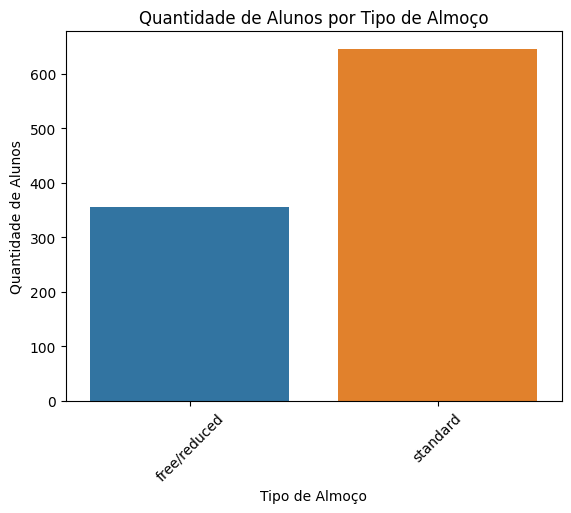

In [ ]:
# Verifique a quantidade de alunos para cada tipo de almoço
sns.countplot(data=df_estudantes_copia, x='lunch', hue='lunch')
plt.title('Quantidade de Alunos por Tipo de Almoço')
plt.xlabel('Tipo de Almoço')
plt.ylabel('Quantidade de Alunos')
plt.xticks(rotation=45);

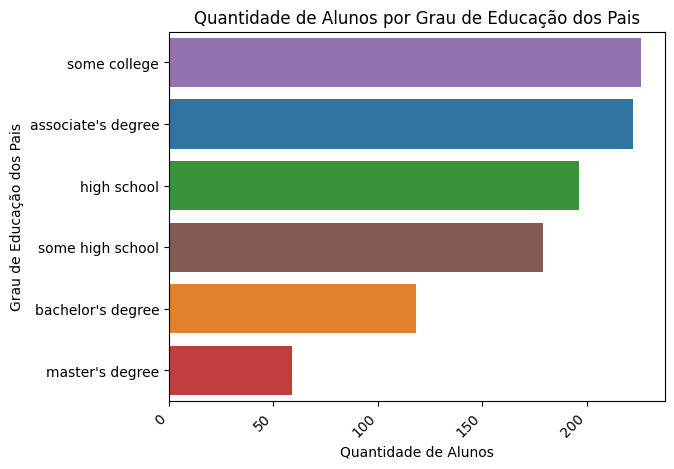

In [ ]:
# Quantidade de Alunos por Grau de Educação dos Pais
sns.countplot(
    data=df_estudantes_copia, y='parental_level_of_education',
    order=df_estudantes_copia['parental_level_of_education'].value_counts().index,
    hue='parental_level_of_education')
plt.title('Quantidade de Alunos por Grau de Educação dos Pais')
plt.ylabel('Grau de Educação dos Pais')
plt.xlabel('Quantidade de Alunos')
plt.xticks(rotation=45, ha='right');

In [ ]:
# Média final das notas dos estudantes por grau de escolaridade dos pais
df_estudantes_copia.groupby('parental_level_of_education')['average_score'].mean().sort_values(ascending=False)

,average_score
parental_level_of_education,
master's degree,73.598644
bachelor's degree,71.923983
associate's degree,69.568964
some college,68.476106
some high school,65.107654
high school,63.097194


### Análises gráficas

#### Questão 1

In [ ]:
# 1.Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais?
media_alunos_mat_escolaridade = df_estudantes_copia.groupby('parental_level_of_education')['math_score'].mean().sort_values(ascending=False)
media_alunos_mat_escolaridade

,math_score
parental_level_of_education,
master's degree,69.745763
bachelor's degree,69.389831
associate's degree,67.882883
some college,67.128319
some high school,63.497207
high school,62.137755


#### Questão 2

##### Leitura

In [ ]:
# Faça a mesma análise para as notas de leitura e escrita

## Medidas de Tendência Central para Leitura
media_reading = df_estudantes_copia['reading_score'].mean()
mediana_reading = df_estudantes_copia['reading_score'].median()
moda_reading = df_estudantes_copia['reading_score'].mode()[0]

print(f'Média de Leitura: {media_reading:.2f}')
print(f'Mediana de Leitura: {mediana_reading:.2f}')
print(f'Moda de Leitura: {moda_reading:.2f}')

Média de Leitura: 69.17
Mediana de Leitura: 70.00
Moda de Leitura: 72.00


In [ ]:
## Medidas de Dispersão para Leitura
variancia_reading = df_estudantes_copia['reading_score'].var()
desvio_padrao_reading = df_estudantes_copia['reading_score'].std()
max_reading = df_estudantes_copia['reading_score'].max()
min_reading = df_estudantes_copia['reading_score'].min()
amplitude_reading = max_reading - min_reading

print(f'Variância de Leitura: {variancia_reading:.2f}')
print(f'Desvio Padrão de Leitura: {desvio_padrao_reading:.2f}')
print(f'Valor Máximo de Leitura: {max_reading:.2f}')
print(f'Valor Mínimo de Leitura: {min_reading:.2f}')
print(f'Amplitude de Leitura: {amplitude_reading:.2f}')

Variância de Leitura: 213.17
Desvio Padrão de Leitura: 14.60
Valor Máximo de Leitura: 100.00
Valor Mínimo de Leitura: 17.00
Amplitude de Leitura: 83.00


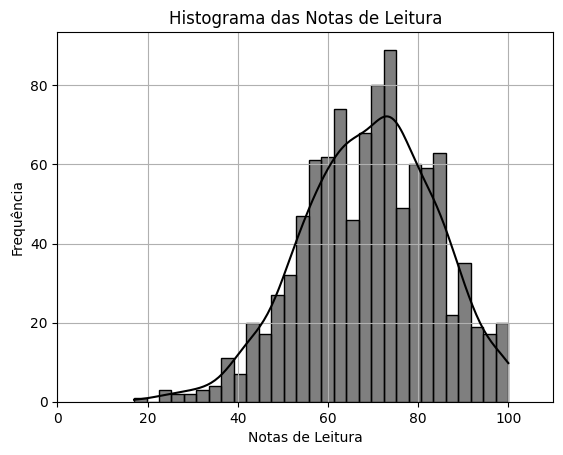

In [ ]:
## Histograma para Leitura
sns.histplot(df_estudantes_copia['reading_score'], bins=30, kde=True, color='black')
plt.xlim(0, 110)
plt.title('Histograma das Notas de Leitura')
plt.xlabel('Notas de Leitura')
plt.ylabel('Frequência')
plt.grid(True)

A média de notas é diferente da média do eixo, dados não então bem distribuidos em relação ao eixo

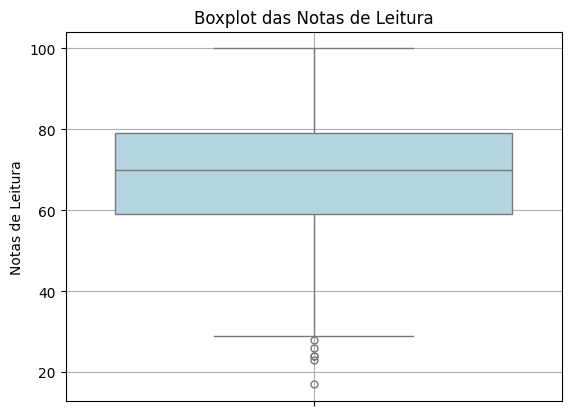

In [ ]:
## Boxplot para Leitura
sns.boxplot(y=df_estudantes_copia['reading_score'], color='lightblue', fliersize=5)
plt.title('Boxplot das Notas de Leitura')
plt.ylabel('Notas de Leitura')
plt.grid(True)

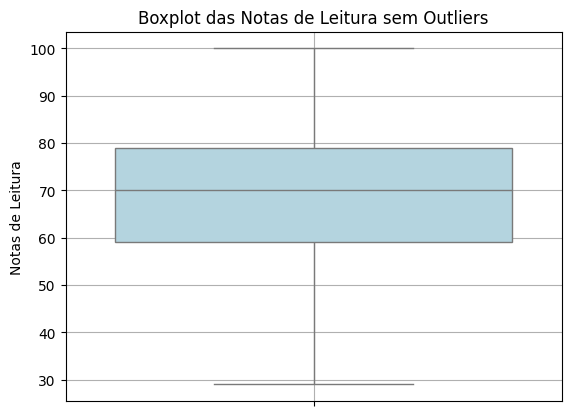

In [ ]:
## Boxplot sem outliers para Leitura
sns.boxplot(y=df_estudantes_copia['reading_score'], color='lightblue', fliersize=5, showfliers=False)
plt.title('Boxplot das Notas de Leitura sem Outliers')
plt.ylabel('Notas de Leitura')
plt.grid(True)

In [ ]:
## Resumo Estatístico Geral para Leitura
df_estudantes_copia['reading_score'].describe()

,reading_score
count,1000.000000
mean,69.169000
std,14.600192
min,17.000000
25%,59.000000
50%,70.000000
75%,79.000000
max,100.000000


In [ ]:
## Identificação de Outliers para Leitura
Q1_reading = df_estudantes_copia['reading_score'].quantile(0.25)
Q3_reading = df_estudantes_copia['reading_score'].quantile(0.75)
IQR_reading = Q3_reading - Q1_reading

limite_inferior_reading = Q1_reading - 1.5 * IQR_reading
limite_superior_reading = Q3_reading + 1.5 * IQR_reading

outliers_reading = df_estudantes_copia[(df_estudantes_copia['reading_score'] < limite_inferior_reading) | (df_estudantes_copia['reading_score'] > limite_superior_reading)]

print(f'Limite Inferior: {limite_inferior_reading:.2f}')
print(f'Limite Superior: {limite_superior_reading:.2f}')
print(f'Número de Outliers: {outliers_reading.shape[0]}')
print(f'Outliers Identificados: {outliers_reading["reading_score"].tolist()}')

Limite Inferior: 29.00
Limite Superior: 109.00
Número de Outliers: 6
Outliers Identificados: [17, 26, 28, 23, 24, 24]


In [ ]:
## Verificação de Valores Ausentes para Leitura
na_reading = df_estudantes['reading score'].isna().sum()
na_reading_perc = (na_reading / len(df_estudantes)) * 100

print(f'Contagem de Valores Ausentes em Leitura: {na_reading}')
print(f'Percentual de Valores Ausentes em Leitura: {na_reading_perc:.2f}%')

Contagem de Valores Ausentes em Leitura: 0
Percentual de Valores Ausentes em Leitura: 0.00%


##### Escrita

In [ ]:
## Medidas de Tendência Central para Escrita
media_writing = df_estudantes['writing score'].mean()
mediana_writing = df_estudantes['writing score'].median()
moda_writing = df_estudantes['writing score'].mode()[0]

print(f'Média de Escrita: {media_writing:.2f}')
print(f'Mediana de Escrita: {mediana_writing:.2f}')
print(f'Moda de Escrita: {moda_writing:.2f}')

Média de Escrita: 68.05
Mediana de Escrita: 69.00
Moda de Escrita: 74.00


In [ ]:
## Medidas de Dispersão para Escrita
variancia_writing = df_estudantes['writing score'].var()
desvio_padrao_writing = df_estudantes['writing score'].std()
max_writing = df_estudantes['writing score'].max()
min_writing = df_estudantes['writing score'].min()
amplitude_writing = max_writing - min_writing

print(f'Variância de Escrita: {variancia_writing:.2f}')
print(f'Desvio Padrão de Escrita: {desvio_padrao_writing:.2f}')
print(f'Valor Máximo de Escrita: {max_writing:.2f}')
print(f'Valor Mínimo de Escrita: {min_writing:.2f}')
print(f'Amplitude de Escrita: {amplitude_writing:.2f}')

Variância de Escrita: 230.91
Desvio Padrão de Escrita: 15.20
Valor Máximo de Escrita: 100.00
Valor Mínimo de Escrita: 10.00
Amplitude de Escrita: 90.00


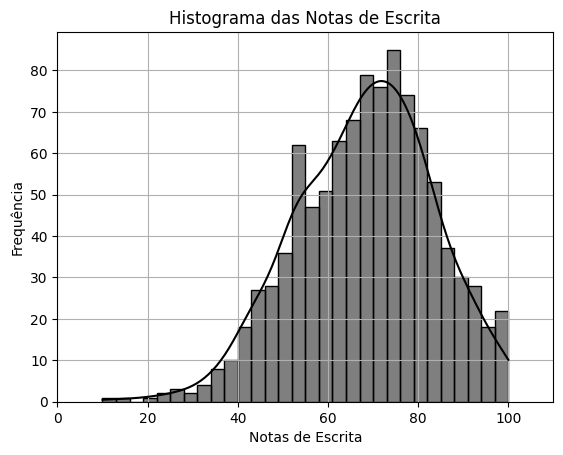

In [ ]:
## Histograma para Escrita
sns.histplot(df_estudantes_copia['writing_score'], bins=30, kde=True, color='black')

plt.xlim(0, 110)
plt.title('Histograma das Notas de Escrita')
plt.xlabel('Notas de Escrita')
plt.ylabel('Frequência')
plt.grid(True)

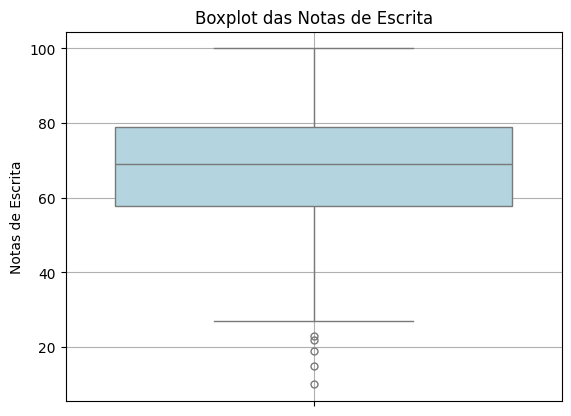

In [ ]:
## Boxplot para Escrita
sns.boxplot(y=df_estudantes_copia['writing_score'], color='lightblue', fliersize=5)
plt.title('Boxplot das Notas de Escrita')
plt.ylabel('Notas de Escrita')
plt.grid(True)

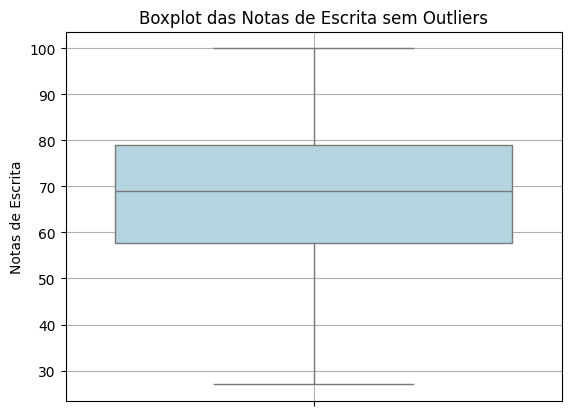

In [ ]:
## Boxplot sem outliers para Escrita
sns.boxplot(y=df_estudantes_copia['writing_score'], color='lightblue', fliersize=5, showfliers=False)
plt.title('Boxplot das Notas de Escrita sem Outliers')
plt.ylabel('Notas de Escrita')
plt.grid(True)

In [ ]:
## Resumo Estatístico Geral para Escrita
df_estudantes_copia['writing_score'].describe()

,writing_score
count,1000.000000
mean,68.054000
std,15.195657
min,10.000000
25%,57.750000
50%,69.000000
75%,79.000000
max,100.000000


In [ ]:
## Identificação de Outliers para Escrita
Q1_writing = df_estudantes_copia['writing_score'].quantile(0.25)
Q3_writing = df_estudantes_copia['writing_score'].quantile(0.75)
IQR_writing = Q3_writing - Q1_writing

limite_inferior_writing = Q1_writing - 1.5 * IQR_writing
limite_superior_writing = Q3_writing + 1.5 * IQR_writing

outliers_writing = df_estudantes_copia[(df_estudantes_copia['writing_score'] < limite_inferior_writing) | (df_estudantes_copia['writing_score'] > limite_superior_writing)]

print(f'Limite Inferior: {limite_inferior_writing:.2f}')
print(f'Limite Superior: {limite_superior_writing:.2f}')
print(f'Número de Outliers: {outliers_writing.shape[0]}')
print(f'Outliers Identificados: {outliers_writing["writing_score"].tolist()}')

Limite Inferior: 25.88
Limite Superior: 110.88
Número de Outliers: 5
Outliers Identificados: [10, 22, 19, 15, 23]


In [ ]:
## Verificação de Valores Ausentes para Escrita
na_writing = df_estudantes_copia['writing_score'].isna().sum()
na_writing_perc = (na_writing / len(df_estudantes)) * 100

print(f'Contagem de Valores Ausentes em Escrita: {na_writing}')
print(f'Percentual de Valores Ausentes em Escrita: {na_writing_perc:.2f}%')

Contagem de Valores Ausentes em Escrita: 0
Percentual de Valores Ausentes em Escrita: 0.00%


#### Questão 3


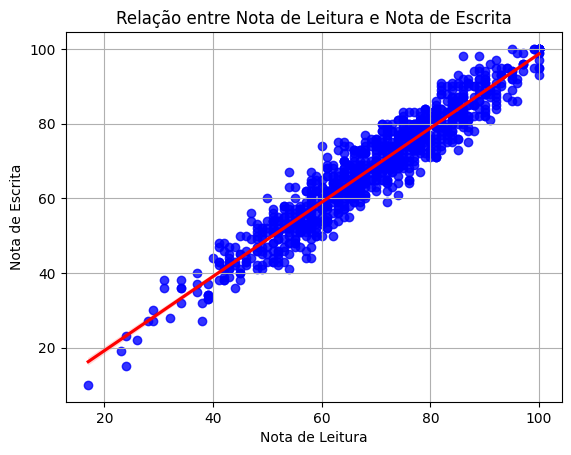

In [ ]:
# Verifique graficamente a relação da nota de leitura e de escrita.

## Gráfico de Dispersão com Linha de Tendência
sns.regplot(x='reading_score', y='writing_score', data=df_estudantes_copia, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Relação entre Nota de Leitura e Nota de Escrita')
plt.xlabel('Nota de Leitura')
plt.ylabel('Nota de Escrita')
plt.grid(True)

In [ ]:
## Correlação entre todas as Caraterísticas númericas
numerica_cols = ['math_score', 'reading_score', 'writing_score']
df_estudantes_copia[numerica_cols].corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


#### 4. Atividade extra:


Nota Média de Matemática por Tipo de Almoço
lunch
standard        70.03
free/reduced    58.92
Name: math_score, dtype: float64



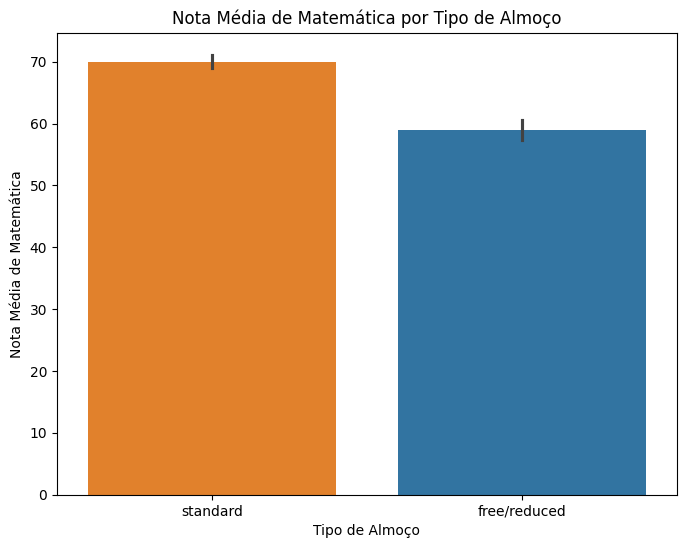

In [ ]:
# Explorando como o tipo de almoço afeta as notas

## Nota média de matemática por tipo de almoço
print()
print('Nota Média de Matemática por Tipo de Almoço')
print(df_estudantes_copia.groupby('lunch', observed=False)['math_score'].mean().round(2).sort_values(ascending=False))
print()

## Gráfico das notas médias de matemática por tipo de almoço
plt.figure(figsize=(8, 6))
sns.barplot(x='lunch', y='math_score', data=df_estudantes_copia, estimator='mean', hue='lunch', order=df_estudantes_copia['lunch'].value_counts().index)
plt.title('Nota Média de Matemática por Tipo de Almoço')
plt.xlabel('Tipo de Almoço')
plt.ylabel('Nota Média de Matemática')
plt.show()


        count   mean    std   min   25%   50%   75%    max
gender                                                    
female  518.0  63.63  15.49   0.0  54.0  65.0  74.0  100.0
male    482.0  68.73  14.36  27.0  59.0  69.0  79.0  100.0

        count   mean    std   min    25%   50%   75%    max
gender                                                     
female  518.0  72.61  14.38  17.0  63.25  73.0  83.0  100.0
male    482.0  65.47  13.93  23.0  56.00  66.0  75.0  100.0

        count   mean    std   min   25%   50%    75%    max
gender                                                     
female  518.0  72.47  14.84  10.0  64.0  74.0  82.00  100.0
male    482.0  63.31  14.11  15.0  53.0  64.0  73.75  100.0



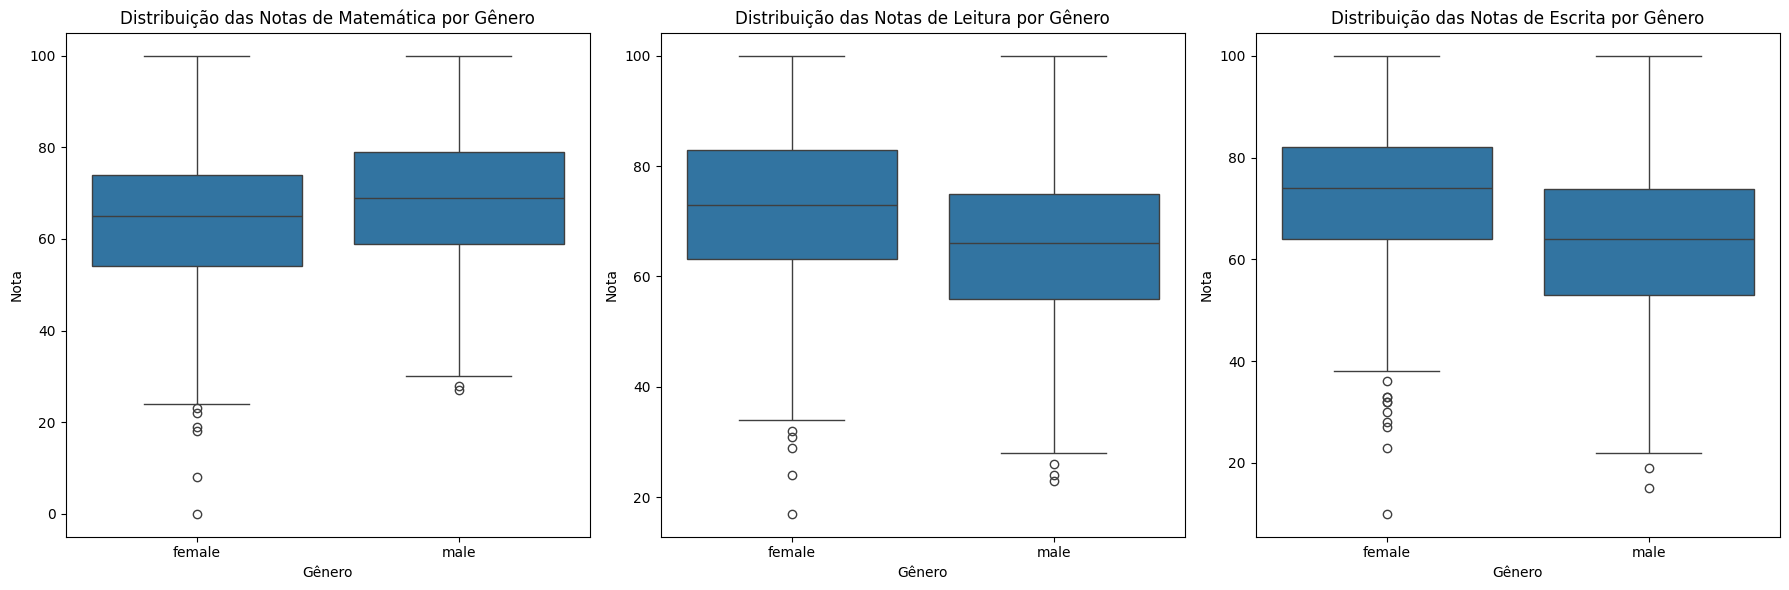

In [ ]:
# Análise da Relação entre Gênero e Notas

## Estatísticas descritivas das notas por gênero
print(df_estudantes_copia.groupby('gender')['math_score'].describe().round(2))
print()
print(df_estudantes_copia.groupby('gender')['reading_score'].describe().round(2))
print()
print(df_estudantes_copia.groupby('gender')['writing_score'].describe().round(2))
print()

## Boxplot das notas por gênero
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='gender', y='math_score', data=df_estudantes_copia, ax=axes[0])
axes[0].set_title('Distribuição das Notas de Matemática por Gênero')
axes[0].set_xlabel('Gênero')
axes[0].set_ylabel('Nota')

sns.boxplot(x='gender', y='reading_score', data=df_estudantes_copia, ax=axes[1])
axes[1].set_title('Distribuição das Notas de Leitura por Gênero')
axes[1].set_xlabel('Gênero')
axes[1].set_ylabel('Nota')

sns.boxplot(x='gender', y='writing_score', data=df_estudantes_copia, ax=axes[2])
axes[2].set_title('Distribuição das Notas de Escrita por Gênero')
axes[2].set_xlabel('Gênero')
axes[2].set_ylabel('Nota')

plt.tight_layout()
plt.show()

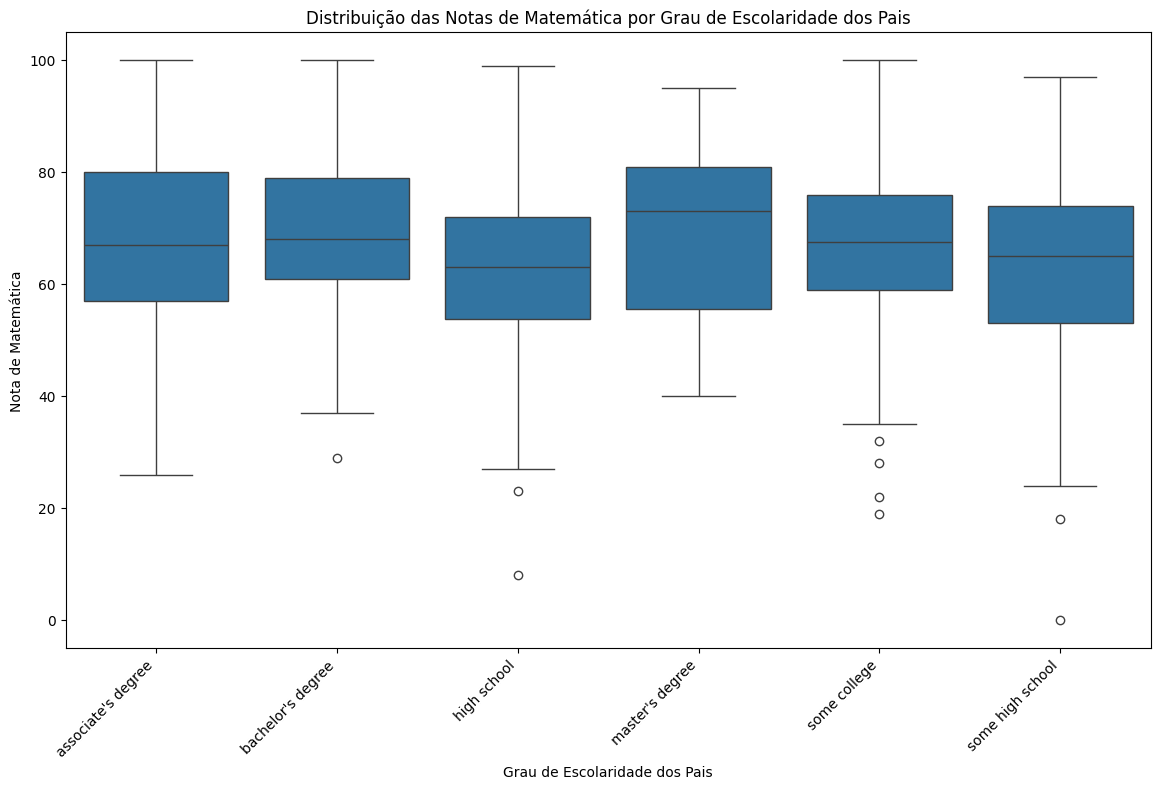

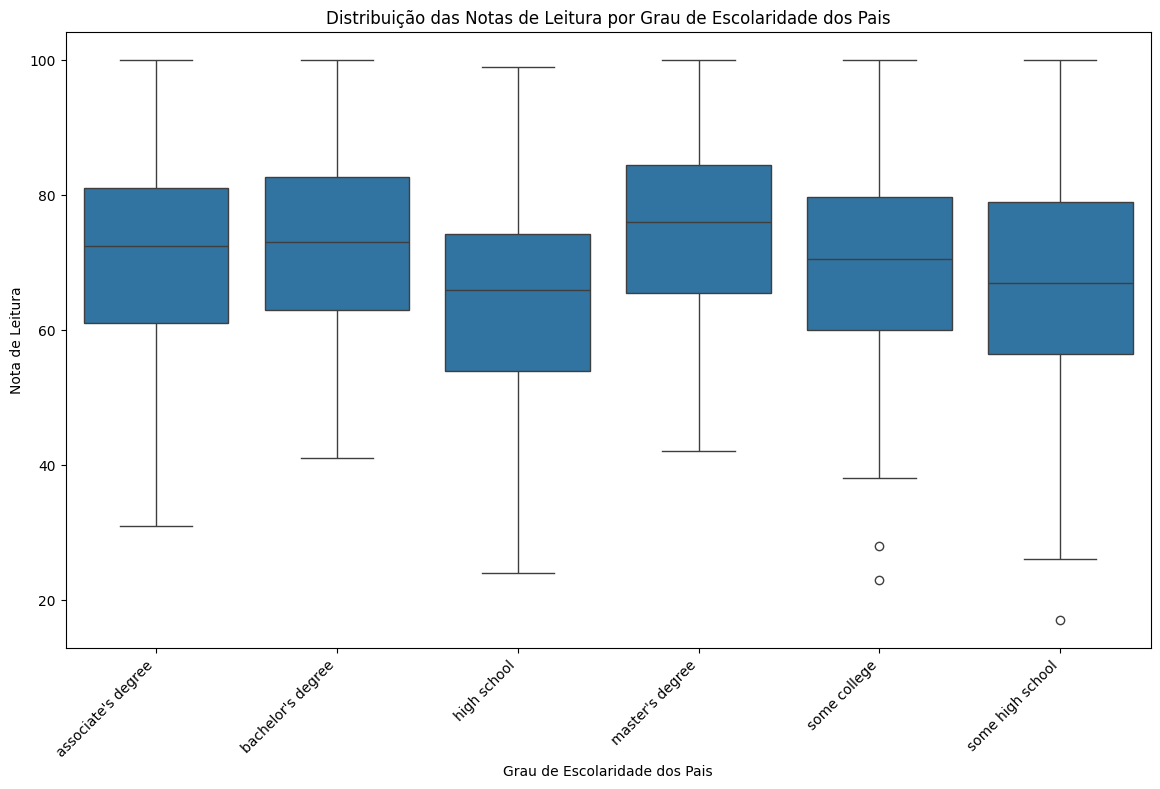

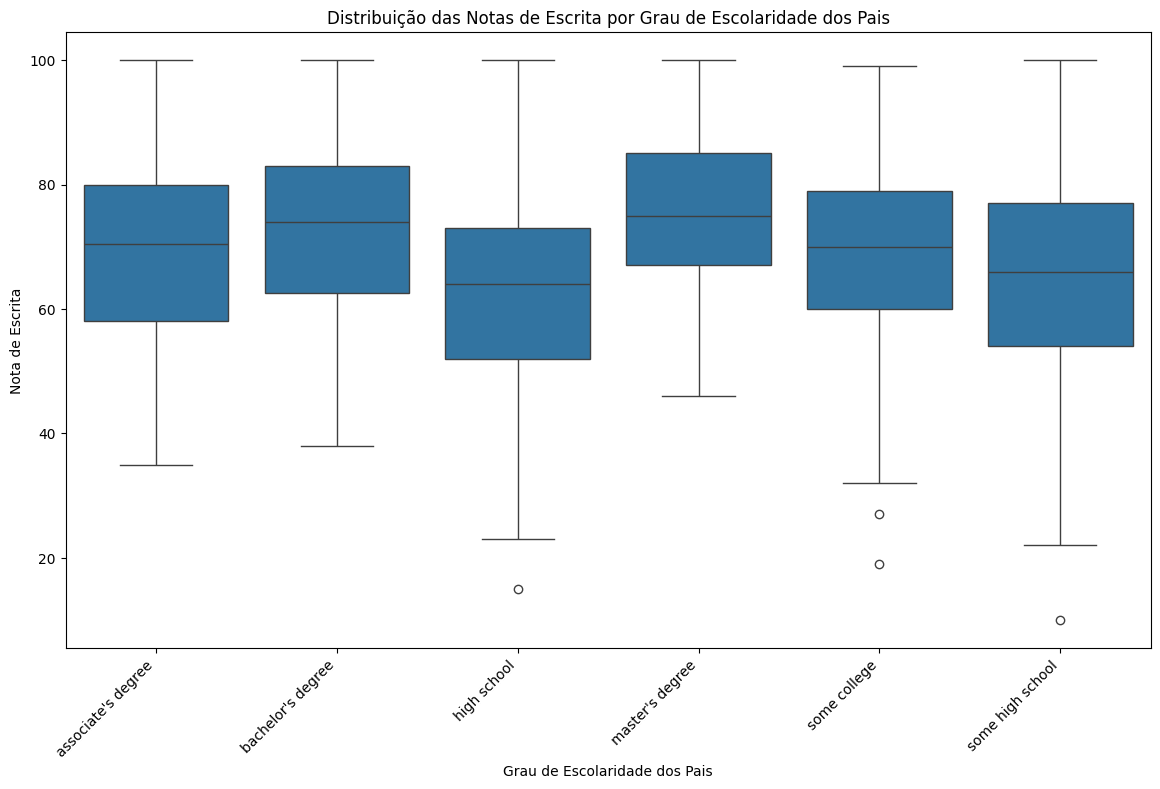

In [ ]:
# Distribuição das Notas por Parental Level of Education

## Boxplot das notas de matemática por grau de escolaridade dos pais
plt.figure(figsize=(14, 8))
sns.boxplot(x='parental_level_of_education', y='math_score', data=df_estudantes_copia)
plt.xticks(rotation=45, ha='right')
plt.title('Distribuição das Notas de Matemática por Grau de Escolaridade dos Pais')
plt.xlabel('Grau de Escolaridade dos Pais')
plt.ylabel('Nota de Matemática')
plt.show()

## Boxplot das notas de leitura por grau de escolaridade dos pais
plt.figure(figsize=(14, 8))
sns.boxplot(x='parental_level_of_education', y='reading_score', data=df_estudantes_copia)
plt.xticks(rotation=45, ha='right')
plt.title('Distribuição das Notas de Leitura por Grau de Escolaridade dos Pais')
plt.xlabel('Grau de Escolaridade dos Pais')
plt.ylabel('Nota de Leitura')
plt.show()

## Boxplot das notas de escrita por grau de escolaridade dos pais
plt.figure(figsize=(14, 8))
sns.boxplot(x='parental_level_of_education', y='writing_score', data=df_estudantes_copia)
plt.xticks(rotation=45, ha='right')
plt.title('Distribuição das Notas de Escrita por Grau de Escolaridade dos Pais')
plt.xlabel('Grau de Escolaridade dos Pais')
plt.ylabel('Nota de Escrita')
plt.show()


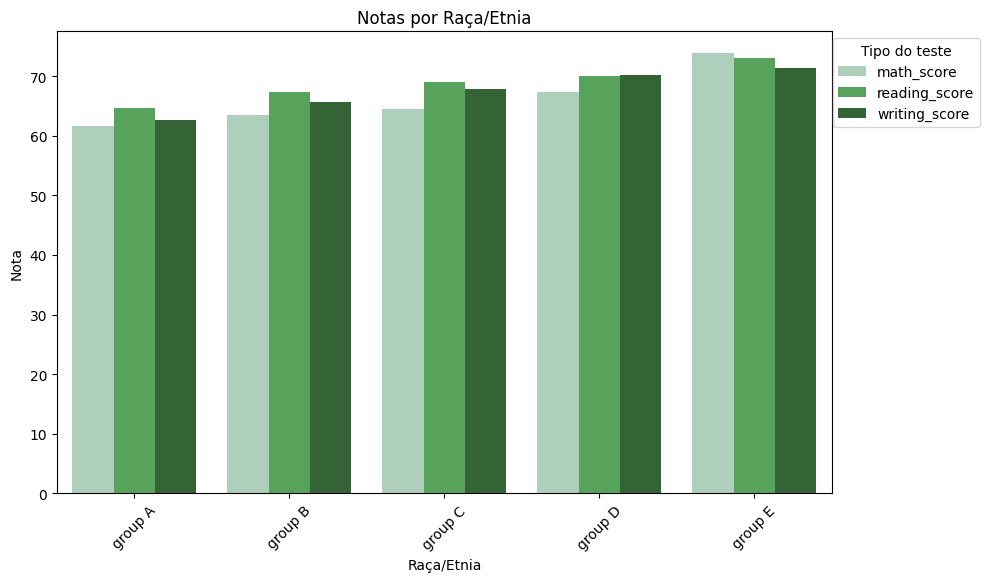

In [ ]:
# Avaliando as notas por race/ethnicity

df_estudantes_copia['math_score'] = pd.to_numeric(df_estudantes_copia['math_score'], errors='coerce')
df_estudantes_copia['reading_score'] = pd.to_numeric(df_estudantes_copia['reading_score'], errors='coerce')
df_estudantes_copia['writing _score'] = pd.to_numeric(df_estudantes_copia['writing_score'], errors='coerce')

## Agrupar apenas as colunas numéricas
media_notas = df_estudantes_copia.groupby('race/ethnicity')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

df_melted = media_notas.melt(id_vars='race/ethnicity', value_vars=['math_score', 'reading_score', 'writing_score'])
custom_palette = ['#A8D5BA', '#4CAF50', '#2C6B2F']

## Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='race/ethnicity', y='value', hue='variable', data=df_melted,palette=custom_palette)

plt.xlabel('Raça/Etnia')
plt.ylabel('Nota')
plt.title('Notas por Raça/Etnia')
plt.xticks(rotation=45)
plt.legend(title='Tipo do teste',loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [ ]:
# Analise de notas por teste do curso preparatorio
media_matematica = df_estudantes_copia.groupby('test_preparation_course', observed=True)['math_score'].mean()
media_leitura = df_estudantes_copia.groupby('test_preparation_course',  observed=True)['reading_score'].mean()
media_escrita = df_estudantes_copia.groupby('test_preparation_course', observed=True)['writing_score'].mean()

tabela_1 = pd.DataFrame({
    'Matematica Media': media_matematica,
    'Leitura Media': media_leitura,
    'Escrita Media': media_escrita
})

## Tabulate
tabulated_tabela = tabulate(tabela_1, headers='keys', tablefmt='grid')
print(tabulated_tabela)


+---------------------------+--------------------+-----------------+-----------------+
| test_preparation_course   |   Matematica Media |   Leitura Media |   Escrita Media |
+===========================+====================+=================+=================+
| completed                 |            69.6955 |         73.8939 |         74.419  |
+---------------------------+--------------------+-----------------+-----------------+
| none                      |            64.0779 |         66.5343 |         64.5047 |
+---------------------------+--------------------+-----------------+-----------------+


In [ ]:
# Analise médias de notas por teste de curso preparatio e grau de escolaridade dos pais
df_estudantes_copia.groupby(['test_preparation_course','parental_level_of_education'])[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

,test_preparation_course,parental_level_of_education,math_score,reading_score,writing_score
0,completed,associate's degree,71.829268,76.170732,76.817073
1,completed,bachelor's degree,73.282609,76.739130,78.695652
2,completed,high school,65.000000,67.839286,68.053571
3,completed,master's degree,70.600000,78.250000,80.100000
4,completed,some college,71.454545,75.987013,76.519481
5,completed,some high school,66.701299,70.948052,70.363636
6,none,associate's degree,65.571429,67.857143,65.842857
7,none,bachelor's degree,66.902778,70.611111,69.986111
8,none,high school,60.992857,63.450000,60.207143
9,none,master's degree,69.307692,73.897436,73.410256


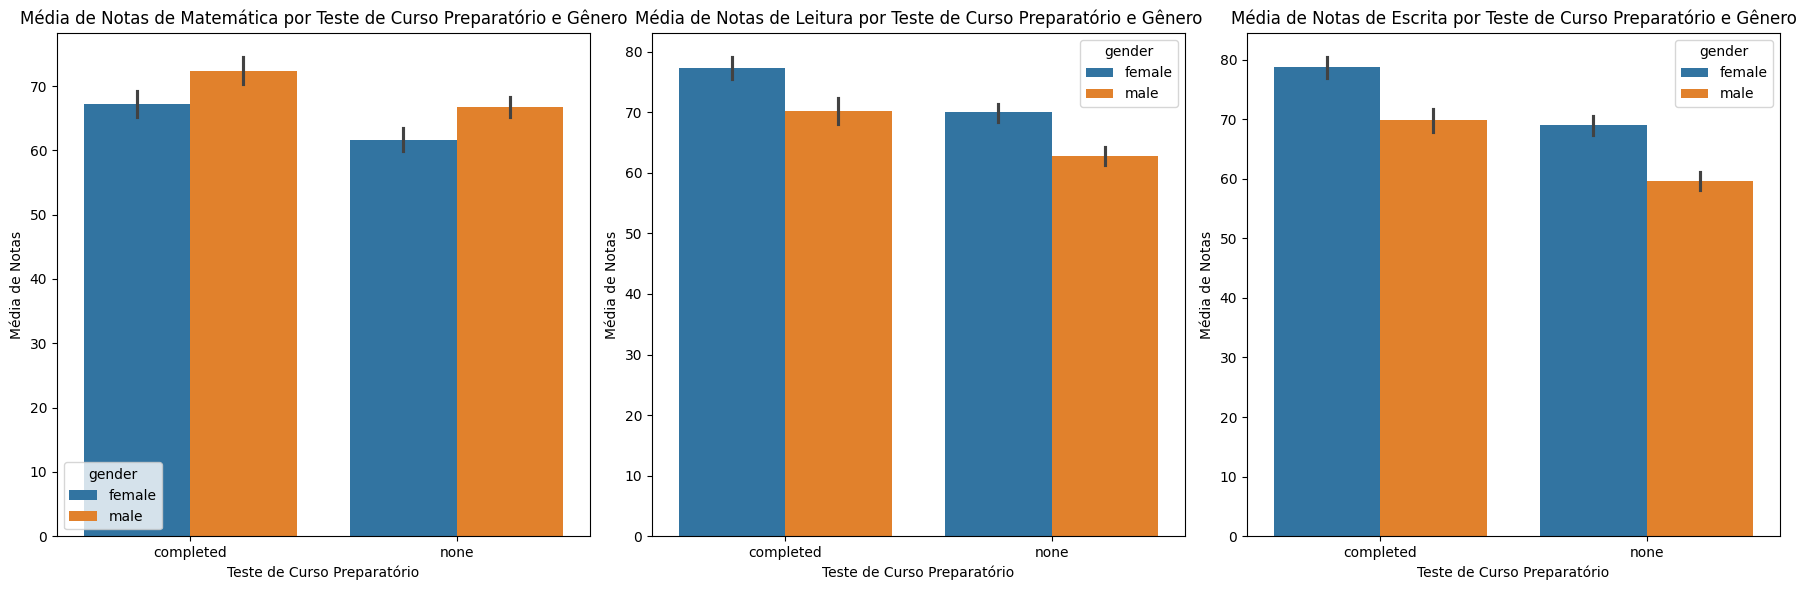

In [ ]:
# Analise media notas de gênero por teste do curso preparatorio

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

## Gráfico de Matemática
sns.barplot(x='test_preparation_course', y='math_score', hue='gender', data=df_estudantes_copia, ax=axes[0])
axes[0].set_title('Média de Notas de Matemática por Teste de Curso Preparatório e Gênero')
axes[0].set_xlabel('Teste de Curso Preparatório')
axes[0].set_ylabel('Média de Notas')

## Gráfico de Leitura
sns.barplot(x='test_preparation_course', y='reading_score', hue='gender', data=df_estudantes_copia, ax=axes[1])
axes[1].set_title('Média de Notas de Leitura por Teste de Curso Preparatório e Gênero')
axes[1].set_xlabel('Teste de Curso Preparatório')
axes[1].set_ylabel('Média de Notas')

## Gráfico de Escrita
sns.barplot(x='test_preparation_course', y='writing_score', hue='gender', data=df_estudantes_copia, ax=axes[2])
axes[2].set_title('Média de Notas de Escrita por Teste de Curso Preparatório e Gênero')
axes[2].set_xlabel('Teste de Curso Preparatório')
axes[2].set_ylabel('Média de Notas')

plt.tight_layout()
plt.show()


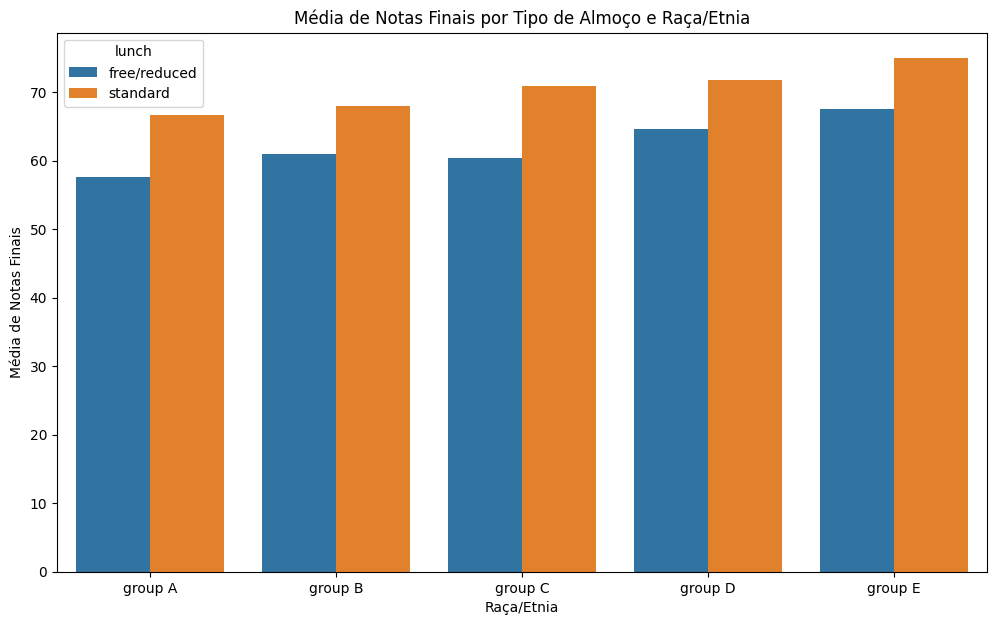

In [ ]:
# Média de notas finais de grupo de etnia por tipo de almoço

df_media_notas = df_estudantes_copia.groupby(['race/ethnicity', 'lunch'])[['average_score']].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='race/ethnicity', y='average_score', hue='lunch', data=df_media_notas)
plt.title('Média de Notas Finais por Tipo de Almoço e Raça/Etnia')
plt.xlabel('Raça/Etnia')
plt.ylabel('Média de Notas Finais')
plt.show()